# Part I: Ford GoBike Dataset Exploration
## by Thárcyla Mourão

> Project [Rubric](https://review.udacity.com/#!/rubrics/3592/view)
---

## Introduction
Ford GoBike was a bike-sharing system that covered the greater San Francisco Bay area from [2017](https://media.ford.com/content/fordmedia/fna/us/en/news/2017/06/27/ford-gobike-launching-in-bay-area-bike-sharing.html) to [2019](https://techcrunch.com/2019/06/11/lyft-deploys-its-pink-wheeled-bikes-and-rebrands-ford-gobike-as-bay-wheels/). This dataset has information on trips taken on February 2019. 

Among the information available in the dataset, we have start time, end time, names of the start and end stations, gender, birth year of users, among others.

The objective of this project is to create a series of exploratory and explanatory visualizations. 

Before delving into the visualizations, I'll first have to do some preliminary data wrangling.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv('data/fordgobike.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


#### General Information

In [3]:
# get general info on the dataset
print(f"This Ford GoBike dataset has {df.shape[0]} lines and {df.shape[1]} columns", "\n")
df.info()

This Ford GoBike dataset has 183412 lines and 16 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  

#### Drop null values

In [4]:
# drop nulls in place
df.dropna(inplace=True)

In [5]:
# reset index
df = df.reset_index(drop=True)

In [6]:
# check to see if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

#### Convert `start_station_id`, `end_station_id` and `member_birth_year` from float to int

Since there were some null values in these columns initially, pandas [automatically](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html) cast those values to floating-point dtype. 

In [7]:
# list with the columns to convert
int_columns = ['start_station_id', 'end_station_id', 'member_birth_year']

# iterate through the list
for column in int_columns:
    df[column] = df[column].astype(int)

In [8]:
# check to see if it worked
df[['start_station_id', 'end_station_id', 'member_birth_year']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   start_station_id   174952 non-null  int32
 1   end_station_id     174952 non-null  int32
 2   member_birth_year  174952 non-null  int32
dtypes: int32(3)
memory usage: 2.0 MB


#### Convert `user_type` from object to categorical dtype

In [9]:
# check user types available in the dataset
df['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [10]:
# turn user_type into a categorical variable

# list of user types available in the dataset
user_types = ['Customer', 'Subscriber']

# create categorical variable with the list
cat_user_types = pd.api.types.CategoricalDtype(ordered=False, categories=user_types)

# apply categorical variable to the column
df['user_type'] = df['user_type'].astype(cat_user_types)

In [11]:
# check to see if it worked
df['user_type'].unique()

['Customer', 'Subscriber']
Categories (2, object): ['Customer', 'Subscriber']

#### Convert `member_gender` from object to categorical dtype

In [12]:
# check genders available in the dataset 
df['member_gender'].unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [13]:
# turn member_gender into a categorical variable

# list of genders available in the dataset
genders = ['Female', 'Male', 'Other']

# create categorical variable with the list
cat_genders = pd.api.types.CategoricalDtype(ordered=False, categories=genders)

# apply categorical variable to the column
df['member_gender'] = df['member_gender'].astype(cat_genders)

In [14]:
# check to see if it worked
df['member_gender'].unique()

['Male', 'Other', 'Female']
Categories (3, object): ['Female', 'Male', 'Other']

#### Convert `start_time` and `end_time` to datetime

In [15]:
# convert start time and end time to datetime
dates = ['start_time', 'end_time']

for column in dates:
    df[column] = pd.to_datetime(df[column])

In [16]:
# check to see if it worked
df[['start_time', 'end_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   start_time  174952 non-null  datetime64[ns]
 1   end_time    174952 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 2.7 MB


#### Convert `bike_share_for_all_trip` from object to bool

In [17]:
# check which values the column currently has
df['bike_share_for_all_trip'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
# create function to make the conversion
def convert_bool(value):
    if value == 'Yes':
        return True
    elif value == 'No':
        return False

df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].apply(convert_bool)

In [19]:
# check to see if it worked
print(df['bike_share_for_all_trip'].unique(), '\n')
df['bike_share_for_all_trip'].info()

[False  True] 

<class 'pandas.core.series.Series'>
RangeIndex: 174952 entries, 0 to 174951
Series name: bike_share_for_all_trip
Non-Null Count   Dtype
--------------   -----
174952 non-null  bool 
dtypes: bool(1)
memory usage: 171.0 KB


#### Drop columns that won't be used in analysis

In [20]:
# use df.drop to drop the columns that won't be used in analysis
df.drop(['start_station_latitude', 
         'start_station_longitude', 
         'end_station_latitude', 
         'end_station_longitude',
         'bike_id'], axis=1, inplace=True)

In [21]:
# check to see if worked
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,False


#### Cleaned dataset

In [22]:
print(f"After cleaning the data, the dataset now has {df.shape[0]} lines and {df.shape[1]} columns", "\n")
df.info()

After cleaning the data, the dataset now has 174952 lines and 11 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  int32         
 6   end_station_name         174952 non-null  object        
 7   user_type                174952 non-null  category      
 8   member_birth_year        174952 non-null  int32         
 9   member_gender            174952 non-null  category      
 10  bike_share_for_all_trip  174952 non-null  bool          
dtypes: 

In [23]:
# show the first five lines
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,False
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),Customer,1972,Male,False
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,Subscriber,1989,Other,False
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,Subscriber,1974,Male,True
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,Subscriber,1959,Male,False


### What is the structure of your dataset?

The cleaned Ford GoBike dataset has 174,952 lines and 11 columns. Among the columns, we have: 
- `duration_sec`: the duration of the trip in seconds, 
- `start_time`: date and time the trip started, 
- `end_time`: date and time the trip ended, 
- `start_station_id`: id of the station where the trip started,
- `start_station_name`: name of the station where the trip started,
- `end_station_id`: id of the station where the trip ended,
- `end_station_name`: name of the station where the trip ended,
- `user_type`: type of user, which can be either *customer* or *subscriber*,
- `member_birth_year`: user gender,
- `member_gender`: user gender,
- `bike_share_for_all_trip`: discounted [memberships](https://mtc.ca.gov/news/ford-gobike-model-equitable-bike-share-access-us-thanks-community-engagement) for low-income riders

### What is the main feature of interest in your dataset?

The main feature of interest for me is figuring out which variables influence *trip duration*.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Looking at the information available to me, I imagine the features that'll support my investigation are start time, end time, names of the start and end stations, user type, member gender, birth year and whether the trip was from the Bike Share for All program.

Most likely, there are times during the day with an increase in the number of trips. Also, places that are more crowded (more popular stations) will also see an increase in the number of trips. User type, member gender and birth year will offer additional insight into what those users look like.

## Univariate Exploration

In [24]:
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,False


#### 1. Univariate: What are the top 10 most common start stations?

In [25]:
base_color = sns.color_palette()[0]

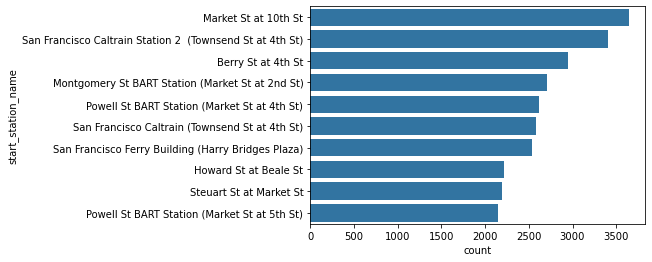

In [26]:
sns.countplot(data=df, y='start_station_name', color=base_color,
             order=df['start_station_name'].value_counts().iloc[:10].index);

**Observations**: 
- Plotting the station names on the y-axis made it easier to interpret it. 
- Now I wonder how much these stations contribute to the whole (their proportion).

#### 1.1. Univariate: What are the top 10 most common start stations, considering their relative frequency?

In [27]:
# get the counts for each start station
start_counts = df['start_station_name'].value_counts()

# get the indexes 
start_index = start_counts.index

> Note: `pyplot.text()` [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html?highlight=pyplot%20text#matplotlib.pyplot.text)

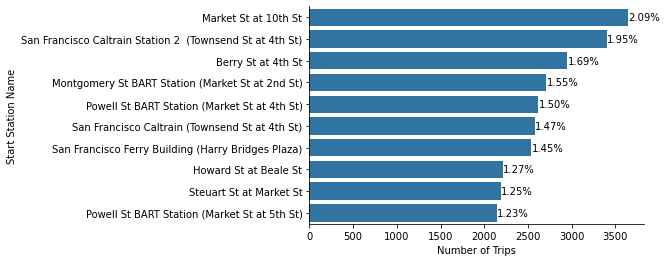

In [28]:
# repeat chart 
sns.countplot(data=df, y='start_station_name', color=base_color, 
              order=df['start_station_name'].value_counts().iloc[:10].index)

# remove right and top spines
sns.despine()

# total number of entries in the column
n_stations = df.shape[0]

# use a loop to print each station's relative frequency on the chart
for i in range(10):
    count = start_counts[i]
    pct_string = '{:0.2f}%'.format(100*count/n_stations)
    plt.text(count+1, i, pct_string, va='center')
    
# include axis labels
plt.ylabel('Start Station Name')
plt.xlabel('Number of Trips');

In [29]:
# what is the sum of the relative frequency from these 10 stations?
sum_top10 = 0

for i in range(10):
    count = start_counts[i]
    pct = 100*count/n_stations
    sum_top10 += pct

print(f'The top 10 most common start stations represent {sum_top10:.1f}% of trips taken from the {start_counts.count()} stations.')

The top 10 most common start stations represent 15.4% of trips taken from the 329 stations.


**Observation**: 
- Now that we've established that the top 10 represent 15% of trips taken from the 329 stations, it seems worth it to find out whether the most common end stations are similar to the start stations.

#### 2. Univariate: What are the top 10 most common end stations, considering their relative frequency?

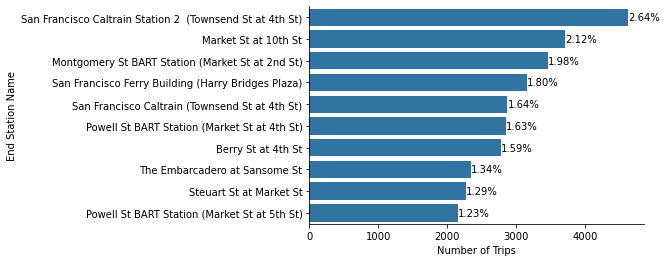

In [30]:
# find total counts for end stations
end_counts = df['end_station_name'].value_counts()

# repeat chart 
sns.countplot(data=df, y='end_station_name', color=base_color, 
              order=df['end_station_name'].value_counts().iloc[:10].index)

# remove top and right spines
sns.despine()

# total number of entries in the column
n_stations = df.shape[0]

# use a loop to print each station's relative frequency on the chart
for i in range(10):
    count = end_counts[i]
    pct_string = '{:0.2f}%'.format(100*count/n_stations)
    plt.text(count+1, i, pct_string, va='center')

# include axis labels
plt.ylabel('End Station Name')
plt.xlabel('Number of Trips');

In [31]:
# what is the sum of the relative frequency from these 10 stations?
sum_top10 = 0

for i in range(10):
    count = end_counts[i]
    pct = 100*count/n_stations
    sum_top10 += pct

print(f'The top 10 most common start stations represent {sum_top10:.1f}% of trips taken from the {end_counts.count()} stations.')

The top 10 most common start stations represent 17.3% of trips taken from the 329 stations.


In [32]:
list1 = df['start_station_name'].value_counts().iloc[:10].index
list2 = df['end_station_name'].value_counts().iloc[:10].index
def intersection(list1, list2):
    list3 = [value for value in list1 if value in list2]
    return list3

In [33]:
len(intersection(list1, list2))

9

**Observations**: 
- The top 10 most common start stations represent 17.3% of all 329 stations. Visually assessing both charts separately, they seem to include more or less the same stations.
- The intersection function above shows that they share 9/10 stations. 

#### 3. Univariate: What is the distribution of trip duration (in seconds)?

In [34]:
# see how the trips are distributed
df['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

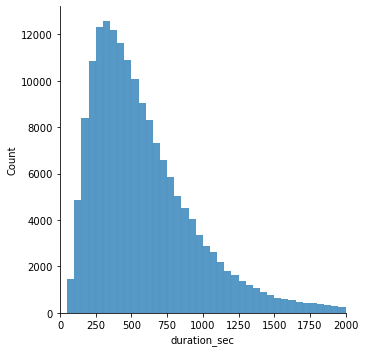

In [35]:
bins = np.arange(0, df['duration_sec'].max()+50, 50)
sns.displot(df['duration_sec'], bins=bins)
plt.xlim((0, 2e3));

**Observations**: 
- Since there is a huge tail, it might be a good idea to use log scale. 
- Also, since 75% of trips had took less than 800 seconds, plotting the chart without `xlim()` would make interpretation nearly impossible. 

#### 3.1. Univariate: What is the distribution of trip duration (in seconds), using log scale in the x-axis?

In [36]:
# to help figure out the new bins, use describe() 
# with np.log10
# the minumum is 1.78 and the max is almost 5
np.log10(df['duration_sec'].describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

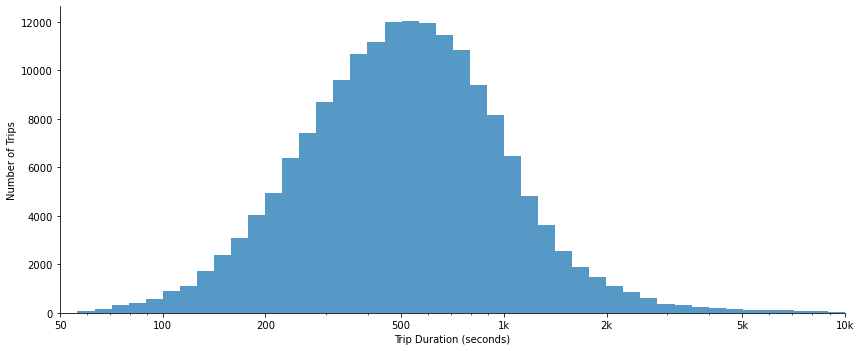

In [37]:
# set new bins
bins = 10 ** np.arange(1.5, 5+0.05, 0.05)

# plot chart
sns.displot(df['duration_sec'], bins=bins)

# use log scale in the x-axis
plt.xscale('log')

# set the xticks and xtick labels

plt.xticks([0, 50, 100, 200, 500, 1e3, 2e3, 5e3, 1e4], [0, 50, 100, 200, 500, '1k', '2k', '5k', '10k'])

# crop x-axis to remove outliers
plt.xlim((50, 1e4))

# axis labels
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Number of Trips')

# increase figure size
plt.gcf().set_size_inches(14,5);

**Observations**: 
- Making the log transformation made analysis easier. Now the distribution resembles a normal one.
- Most trips take between 300 and 1000 seconds, i.e., between 5 and 15 minutes.

#### 4. Univariate: What is the distribution of user types?

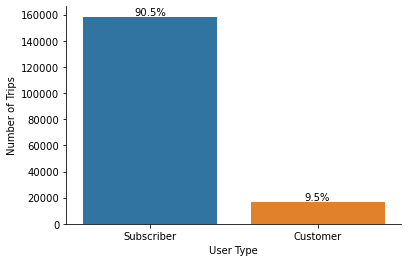

In [38]:
user_counts = df['user_type'].value_counts()

sns.countplot(data=df, x='user_type', order=user_counts.index)
sns.despine()

for i in range(user_counts.shape[0]):
    count = user_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])
    plt.text(i, count+1, pct_string, va='bottom', ha='center')
    
plt.xlabel('User Type')
plt.ylabel('Number of Trips');

**Observations**: 
- 9 out of 10 trips were taken by subscribers. 
- This could suggest that most users use the service as one of their main modes of transportation. 
- Only 10% of trips were taken by casual customers, those that don't have a subscription plan. 
- For practice purposes, I'll try creating this chart as a single horizontal bar, printing the relative frequency of each user type on the bar. 

#### 4.1. Univariate: What is the distribution of user types, considering their relative frequency?

In [39]:
# get relative frequency for user_type == "customer"
customer = df[df['user_type'] == "Customer"]['user_type'].count() 
customer_freq = customer / df.shape[0]
customer_freq

0.09468882893593672

In [40]:
# get relative frequency for user_type == "subscriber"
subscriber = df[df['user_type'] == "Subscriber"]['user_type'].count() 
subscriber_freq = subscriber / df.shape[0]
subscriber_freq

0.9053111710640633

> Note: [this](https://pythonguides.com/stacked-bar-chart-matplotlib/) tutorial helped me include the values on the bars.

> Note: [this](https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html) tutorial helped me customize the plot legends.

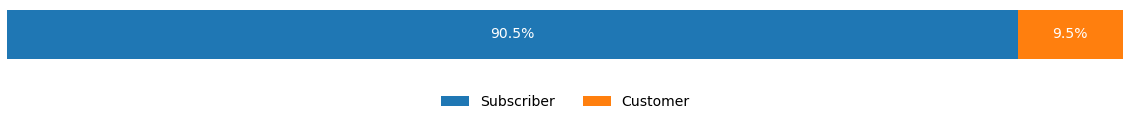

In [41]:
# plot horizontal bar chart with relative frequency
plt.figure(figsize=[20,1])
plt.barh(y=df['user_type'].unique()[0], width=subscriber_freq)
plt.barh(y=df['user_type'].unique()[0], width=customer_freq, left=subscriber_freq)
plt.legend(['Subscriber', 'Customer'], loc=10, bbox_to_anchor=(0.45, 0.75, 0.1, -3), frameon=False, ncol=2, fontsize=14)
plt.yticks('')
plt.xlim((0, 1))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.axis('off')

for i in plt.gca().patches:
    height = i.get_height()
    width = i.get_width()
    x = i.get_x()
    y = i.get_y()
    label_text = '{:.1f}%'.format(width*100)
    label_x = x + width / 2
    label_y = y + height / 2
    plt.gca().text(label_x, label_y, label_text, ha='center', va='center', fontsize=14, color='white')

**Observations**: 
- 9 out of 10 users have a subscription plan. 

#### 5. Univariate: What is the distribution of user birth year?

In [42]:
# That 1878 is definitely a typo
df['member_birth_year'].describe()

count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

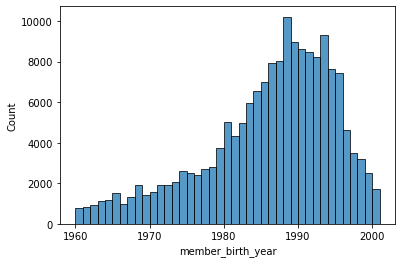

In [43]:
# this chart would be more informative if instead 
# of birth year, I had user age
bins = np.arange(1960, df['member_birth_year'].max()+1, 1)
sns.histplot(data=df, x='member_birth_year', color=base_color, bins=bins);

**Observation**:
- Trying to work out age from birth year is more mental gymnastics than readers and I deserve. 
- I'll try plotting this again using user age instead.

#### 5.1. Univariate: What is the distribution of user age?

In [44]:
# create age column based on the year
# of the last recorded trip of this dataset

# finding the year of the last recorded trip: 2019
df['end_time'].sort_values(ascending=False).iloc[:1]

0   2019-03-01 08:01:55.975
Name: end_time, dtype: datetime64[ns]

In [45]:
# find the age users had in 2019 and 
# create a column with this information
df['age'] = 2019 - df['member_birth_year']

In [46]:
# check to see if it worked
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,False,35
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),Customer,1972,Male,False,47
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,Subscriber,1989,Other,False,30


In [47]:
# now that the age column is created,
# check how it's distributed
# this information will inform the chart below
df['age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

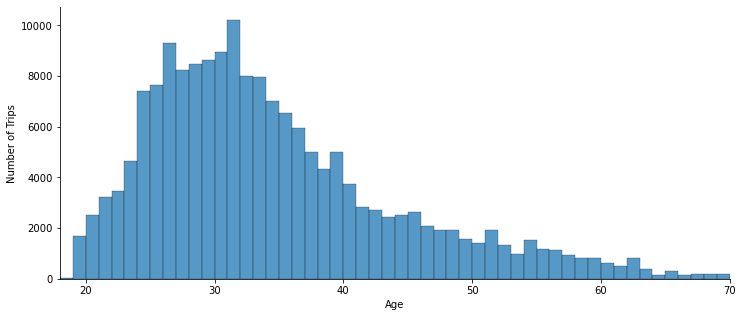

In [48]:
bins = np.arange(18, df['age'].max()+1, 1)
sns.histplot(data=df, x='age', color=base_color, bins=bins)
sns.despine()
plt.xlim(18,70)
plt.xlabel('Age')
plt.ylabel('Number of Trips')
plt.gcf().set_size_inches(12,5);

**Observations**: 
- From the chart we can see that most users are between 18 and 40 years. 
- Age is most likely a motivating factor in the decision to grab a bike. 
- Also, the minimum birth year recorded is 1878, which is probably a typo. I removed the outliers from the chart to facilitate analysis.

#### 6. Univariate: What is the gender distribution?

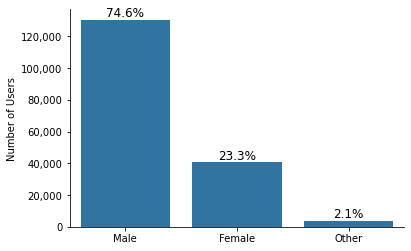

In [49]:
gender_counts = df['member_gender'].value_counts()

sns.countplot(data=df, x='member_gender', order=gender_counts.index, color=base_color)
sns.despine()

for i in range(gender_counts.shape[0]):
    count = gender_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])
    plt.text(i, count+1, pct_string, va='bottom', ha='center', fontsize=12)
    
ax = plt.gca()
ax.yaxis.set_major_formatter('{x:,.0f}')
plt.xlabel('')
plt.ylabel('Number of Users');

**Observation**: 
- 3 out of 4 trips were taken by male users. 

#### 7. Univariate: What is the distribution of the bike share for all program?

In [50]:
# get the number of regular trips and trips that were part of the program
bike_share = df['bike_share_for_all_trip'].value_counts()
bike_share

False    157606
True      17346
Name: bike_share_for_all_trip, dtype: int64

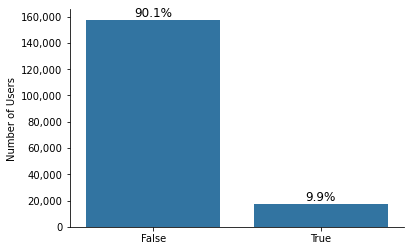

In [51]:
sns.countplot(data=df, x='bike_share_for_all_trip', color=base_color);
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)
ax.yaxis.set_major_formatter('{x:,.0f}')
plt.xlabel('')
plt.ylabel('Number of Users');

for i in range(bike_share.shape[0]):
    count = bike_share[i]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])
    plt.text(i, count+1, pct_string, va='bottom', ha='center', fontsize=12)

**Observation**: 
-Only 1 out of 10 trips are discounted ones, part of the Bike Share for All program.

#### 8. Univariate: What is the distribution of start times of trips?

In [52]:
# create a column with the starting hour of every trip
df['hour'] = df['start_time'].dt.hour

In [53]:
# check to see if it worked
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,False,35,17
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),Customer,1972,Male,False,47,12
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,Subscriber,1989,Other,False,30,17
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,Subscriber,1974,Male,True,45,23
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,Subscriber,1959,Male,False,60,23


In [54]:
# get the number of trips per hour
hour_freq = df.groupby(['hour'])['hour'].count()

In [55]:
# get the indexes of the peak hours
# this will be useful when drawing the vertical line
# in the x-axis below to draw attention to peak times: 17:00 and 8:00
hour_sorted = hour_freq.sort_values(ascending=False).index
hour_sorted

Int64Index([17,  8, 18,  9, 16,  7, 19, 15, 12, 13, 10, 14, 11, 20, 21,  6, 22,
            23,  0,  5,  1,  2,  4,  3],
           dtype='int64', name='hour')

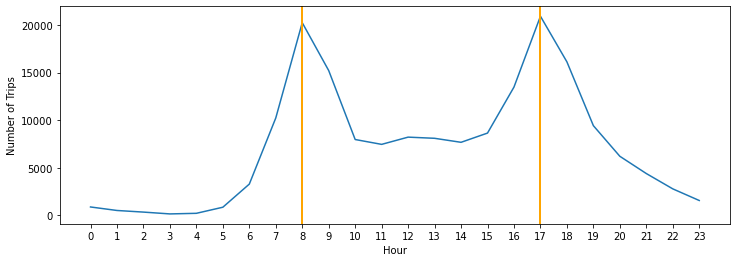

In [56]:
# plot line chart of the hourly distribution of trips
plt.figure(figsize=[12,4])
sns.lineplot(x=hour_freq.keys(), y=hour_freq)
plt.xticks(range(0,24))
plt.axvline(x=hour_sorted[0], color='orange', linewidth=2)
plt.axvline(x=hour_sorted[1], color='orange', linewidth=2)
plt.ylabel('Number of Trips')
plt.xlabel('Hour');

**Observations**: 
- During peak times, the number of trips increase significantly. In order to emphasize this trend, I included two vertical lines on the two peaks: one at 8 a.m., and another at 5 p.m. (17:00). 
- Interestingly, from 10am to 3pm, the number of trips taken are more or less the same.
- The earlier hours have the least amount of trips.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There are trips of more than 80k seconds, which is almost a day. Still, most of them take between 300 and 1000 seconds, i.e., between 5 and 15 minutes. Once I plotted the histogram, it became clear that this highly skewed distribution would benefit from applying a logarithmic function, which I then did. The resulting chart resembled a normal distribution. It's worth mentioning that there were some outliers, which I dealt with using `plt.xlim()` to limit the x-axis and facilitate analysis. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

In order to facilitate analysis, I created another column, `age`, subtracting the year the trips were recorded in the dataset (2019) from each birth year. Then, I used `plt.xlim()` to limit the x-axis from 18 (there were no users younger than 18) to 70. From there, it became clear that most users are between 18 and 40 years old. 

In the distribution of age, there were also outliers. The earliest birth year recorded is 1878, which was most likely a typo during user registration.

Plotting the number of trips per hour, we can see a bimodal distribution, with peaks at 8am and 5pm, probably representing commuter traffic.

As far as the user type distribution goes, 9 out of 10 trips were from subscribers, which might indicate users consider the service one of their main modes of transportation. Only 1 out of 10 is a customer without a subscription, which might come from more casual users or tourists. 

I was also interesting in checking the gender distribution. After plotting a bar chart, I noticed most trips were taken by males, while 1 out of 4 trips were taken by females, and only 2% of trips came from non-binary users. 

## Bivariate Exploration

#### 9. Bivariate: Start hour vs. trip duration (seconds)

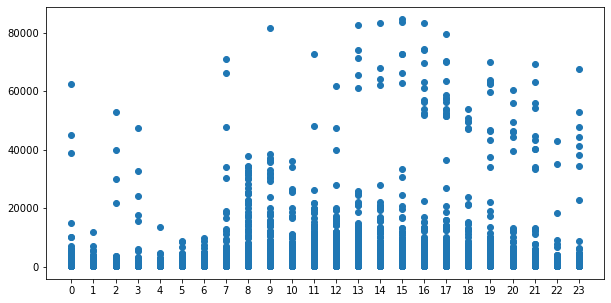

In [57]:
plt.figure(figsize=[10,5])
plt.scatter(data=df, x='hour', y='duration_sec')
plt.xticks(range(0,24));

**Observation**: 
- The longer trips tend to happen at later hours.

#### 10. Bivariate: Start hour vs. total time travelled (hours)

In [58]:
# get the sum of seconds traveled starting at a given hour
# divide it by 3600 so we convert it to hours
# it'll make the visualization more easy to interpret
hour_vs_duration = df.groupby(['hour'])['duration_sec'].sum() / 3600

In [59]:
# get the indexes of the peak hours
# this will be useful when drawing the vertical line
# in the x-axis below to draw attention to peak times: 17:00 and 8:00
hour_vs_dur_sorted = hour_vs_duration.sort_values(ascending=False).index

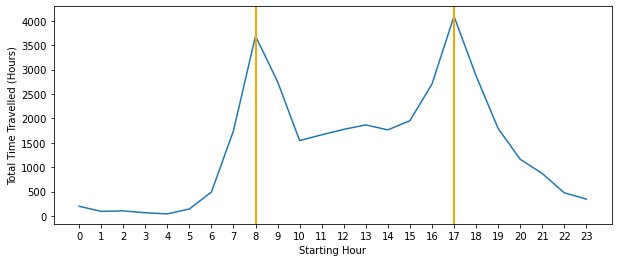

In [60]:
# plot line chart of total seconds traveled by hour
plt.figure(figsize=[10,4])
sns.lineplot(x=hour_vs_duration.keys(), y=hour_vs_duration)
plt.xticks(range(0,24))
plt.axvline(x=hour_vs_dur_sorted[0], color='orange', linewidth=2)
plt.axvline(x=hour_vs_dur_sorted[1], color='orange', linewidth=2)
plt.ylabel('Total Time Travelled (Hours)')
plt.xlabel('Starting Hour');

**Observations**: 
- When considering the total amount of time travelled per hour, we see that the second peak (5pm) is slightly higher than the morning one. 
- Also, during late morning and mid-afternoon, the total amount of time travelled reach a plateau. 

#### 11. Bivariate: Age vs. trip duration (seconds)

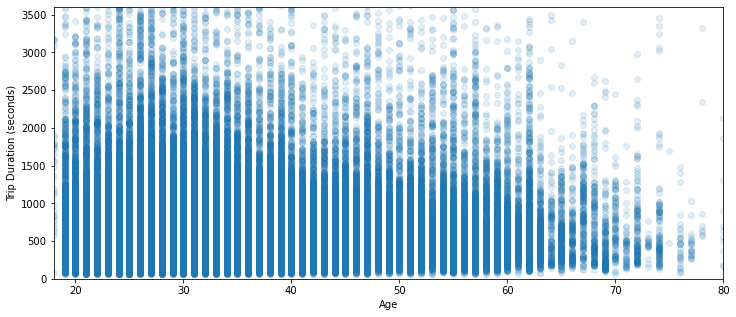

In [61]:
# plot a scatter plot considering user age and trip duration 
plt.figure(figsize=[12,5])
plt.scatter(data=df, x='age', y='duration_sec', alpha=1/8)
plt.xlim([18, 80])
plt.ylim([0, 3600])
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Age');

**Observations**: 
- Considering trips of up to 3600 seconds (an hour), the majority of them were taken by people in the 18-40 age bracket.
- For practice purposes, I'll try plotting these same two variables as a heat map.

#### 11.1. Bivariate: Age vs. trip duration (seconds) as a heat map

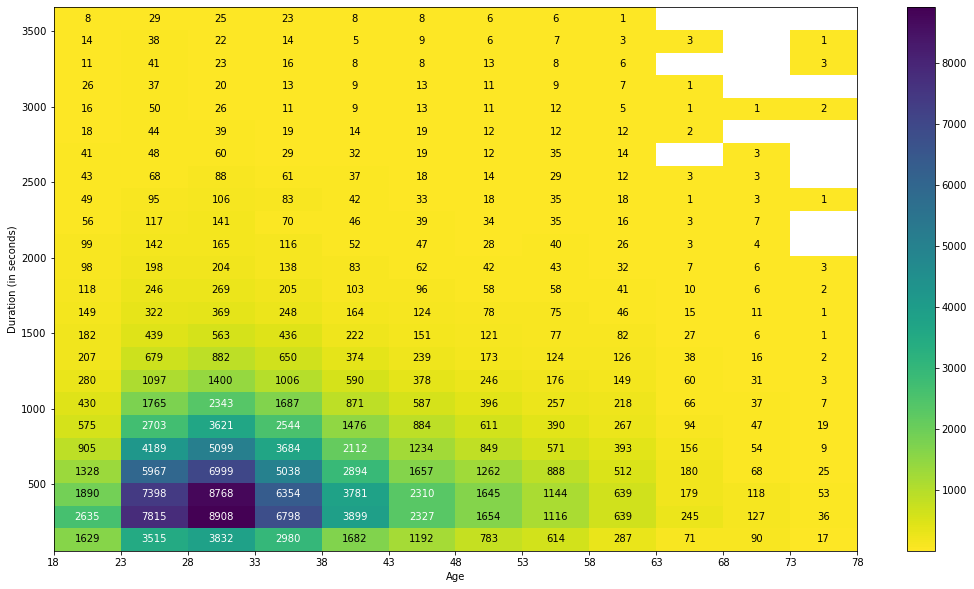

In [62]:
# bins for each axis considering their distribution
bins_x = np.arange(18, 78+5, 5)
# limit y-axis bins to 3600 so chart is more easily interpreted
bins_y = np.arange(60, 3600+150, 150)

# plot heatmap
plt.figure(figsize=[18,10])
h2d = plt.hist2d(data=df, x='age', y='duration_sec', cmin=0.1, cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xticks(range(18,80+1,5))
plt.ylabel('Duration (in seconds)')
plt.xlabel('Age');

# print counts on each block
counts = h2d[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i, j]
        if c >= 2e3:
            plt.text(bins_x[i]+2.5, bins_y[j]+75, int(c),
                    ha='center', va='center', color='white')
        elif c > 0:
            plt.text(bins_x[i]+2.5, bins_y[j]+75, int(c),
                      ha='center', va='center', color='black')

**Observations**: 
- Instead of a scatter plot, I tried plotting a heat map to see if I interpreted the previous chart correctly. 
- Now it might be worth investigating the *total* time travelled vs. age. 

#### 12. Bivariate: Age vs. Total time travelled (hours)

In [63]:
# group by age and get the total amount travelled by hour
age_vs_duration = df.groupby(['age'])['duration_sec'].sum() / 3600

In [64]:
# get the indexes in descending order to make 
# a vertical line on the biggest one
age_vs_dur_sorted = age_vs_duration.sort_values(ascending=False).index

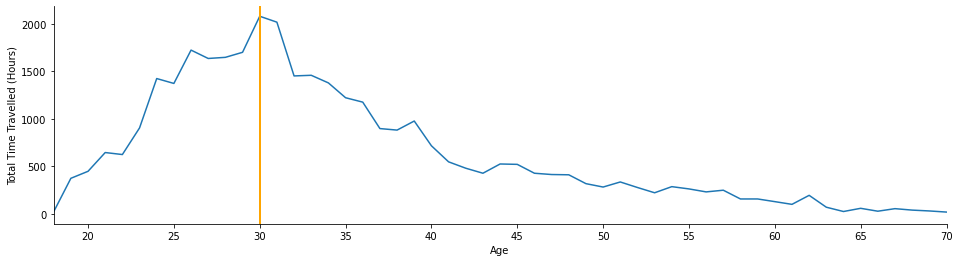

In [65]:
# plot line chart
plt.figure(figsize=[16,4])
sns.lineplot(x=age_vs_duration.keys(), y=age_vs_duration)
plt.axvline(x=age_vs_dur_sorted[0], color='orange', linewidth=2)
plt.xlim([18,70])
plt.xticks(np.arange(20,70+5, 5))
plt.ylabel('Total Time Travelled (Hours)')
plt.xlabel('Age')
plt.gca().spines[['top', 'right']].set_visible(False);

**Observations**: 
- 30-year-old people spent the most time on a bike, a little more than 2000 hours total.
- On this unimodal distribution, the total amount of time travelled steadily increase up to 30-years-old, and then slowly decreases.

#### 13. Bivariate: Age vs. Start Hour

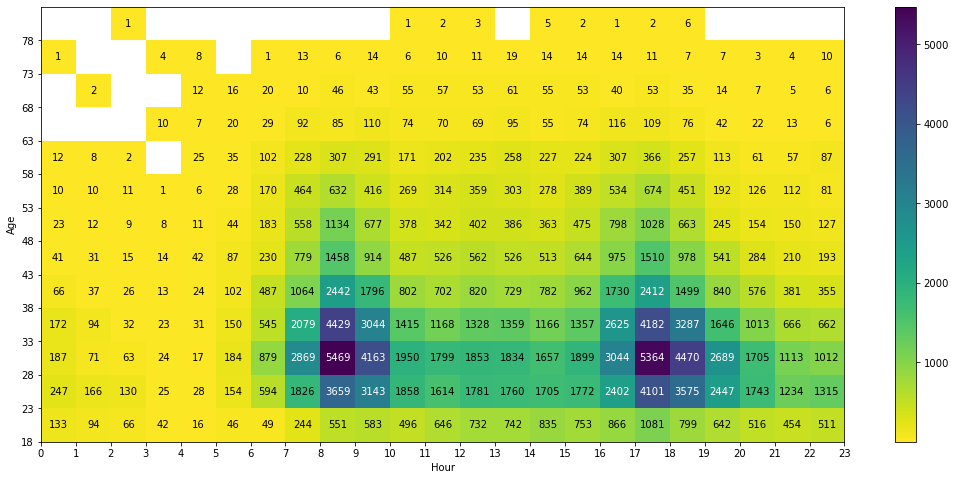

In [66]:
bins_x = np.arange(0, df['hour'].max()+1, 1)
bins_y = np.arange(18, 80+5, 5)

plt.figure(figsize=[18,8])
h2d = plt.hist2d(data=df, x='hour', y='age', cmin=0.1, cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xticks(range(0,24));
plt.yticks(range(18,80+1,5))
plt.ylabel('Age')
plt.xlabel('Hour');

counts = h2d[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i, j]
        if c >= 2e3:
            plt.text(bins_x[i]+0.5, bins_y[j]+2.5, int(c),
                    ha='center', va='center', color='white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+2.5, int(c),
                      ha='center', va='center', color='black')

**Observations**: 
- For this plot, I thought it'd be nice to plot two variables that I believe are important to investigate their relationship to my variable of interest (trip duration), but in relation to each other. 
- From the heat map above, we can see most trips were taken by people in their 20s to 40s. The peaks at 8am and 5pm are also observable. 
- At the very early hours of the day, we can also see trips from younger people, which might indicate they use the bikes after a night out as well. 

#### 14. Bivariate: Gender vs. Trip duration (seconds)

In [67]:
# check the distribution of duration grouped by gender
df.groupby(['member_gender'])['duration_sec'].describe()

,count,mean,std,min,25%,50%,75%,max
member_gender,,,,,,,,
Female,40805.0,778.872761,1787.003612,61.0,361.0,567.0,864.0,83195.0
Male,130500.0,672.394851,1504.794560,61.0,311.0,493.0,761.0,84548.0
Other,3647.0,997.328489,3526.245996,63.0,344.0,556.0,874.5,82512.0


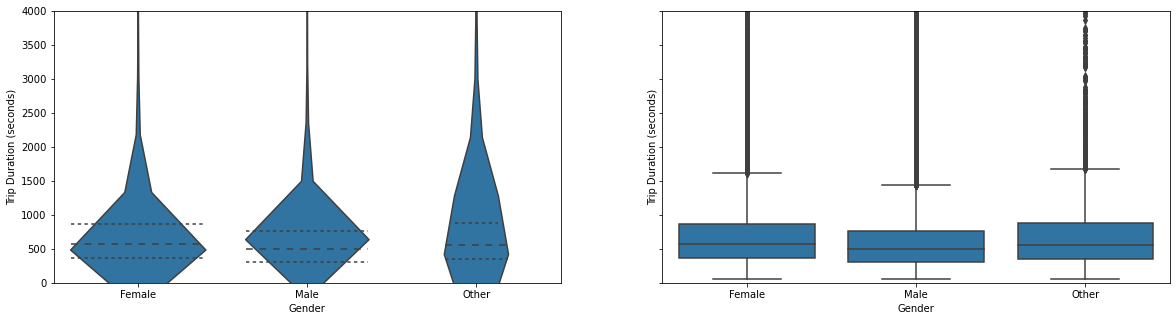

In [68]:
# I'll try creating a violin plot and a box plot, side-by-side
# using gender and trip duration

fig, axes = plt.subplots(1, 2, figsize=[20,5], sharey=True)

# plot 1: violin 
sns.violinplot(ax=axes[0], data=df, x='member_gender', y='duration_sec', color=base_color, inner='quartile')
axes[0].set_ylim([0, 4000])
axes[0].set_ylabel('Trip Duration (seconds)')
axes[0].set_xlabel('Gender')

# plot 2: box plot
sns.boxplot(data=df, x='member_gender', y='duration_sec', color=base_color)
axes[1].set_ylabel('Trip Duration (seconds)')
axes[1].set_xlabel('Gender');

**Observations**: 
- The trip duration for non-binary users is more evenly distributed than males and females. Female and male trips tend to be around 10 minutes or so. 
- When looking at trips that take from 1500 seconds (25 minutes) to 2000 seconds (35 minutes), however, these are more common among females than males. 
- It's worth noting that these nuances were better noticed in the violin plot than the box plot, in this case. 

#### 15. Bivariate: User type vs. Duration (seconds)

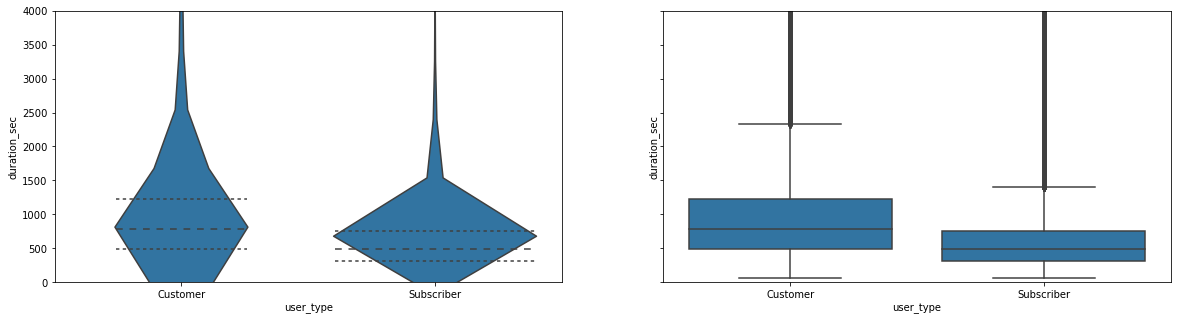

In [69]:
# since user type, as was the case with gender, is a categorical variable,
# I'll repeat the approach of plotting a violin and a box plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=[20,5], sharey=True)

# plot 1: violin 
sns.violinplot(ax=axes[0], data=df, x='user_type', y='duration_sec', color=base_color, inner='quartile')
axes[0].set_ylim([0, 4000]);

# plot 2: box plot
sns.boxplot(data=df, x='user_type', y='duration_sec', color=base_color)
axes[1].set_ylim([0, 4000]);

**Observations**: 
- Customers tend to take longer trips than subscribers. 
- This might be because of the more casual nature of their trips. 

In [70]:
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,False,35,17


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In this section, I tried plotting some variables against my feature of interest, trip duration. When I used start hour and trip duration, I noticed longer trips tend to happen at later hours. 

Then, I had the idea to make a transformation and use *total travelled time* instead. When I did that, a bimodal distribution appeared, with peaks at 8am and 5pm. Also, interestingly enough, during late morning to mid-afternoon, total travelled time by hour hits a plateau, until it picks up again at around 4pm. 

Once I created a scatterplot of trip duration and age, it's clear most trips were taken by people in their 20s to 40s. Then, I plotted a heatmap to confirm this interpretation, and sure enough, it was there. The heat map showed higher density for trips of less than 1,000 seconds (around 15 minutes), especially from people ranging from 23 to 43 years old. 

While investigating the relationship between age and trip duration, I also tried plotting age against the total travelled time. Once I did that, I noticed 30-year-old people spent the most time on a bike, a little more than 2,000 hours total. On this unimodal distribution, the total amount of time travelled steadily increase up to 30-years-old, and then slowly decreases.

At this point, I moved on to investigate my main feature of interest, trip duration, against categorical variables. First, I did a violin plot and a box plot of the relationship between trip duration and gender. Once I did that, I noticed the trip duration for non-binary users is more evenly distributed than males and females. Female and male trips tend to be around 10 minutes or so. Also, longer trips that take from 25 to 35 minutes are more common among females than males. These nuances were better noticed in the violin plot than the box plot, in this instance. 

Finally, I did a similar approach for trip duration and user type. From the chart, we can clearly see that customers tend to take longer trips than subscribers. A possible explanation might be the more casual nature of their trips. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I plotted a heat map to investigate te relationship between age and start hour of trips. The plot shows what we've established before, both the fact that most trips were taken by people in their 20s to 40s, also that the peaks are at 8am and 5pm. Which was interesting was that at the very early hours of the day (before sunrise), we can also see trips from younger people, which might indicate they use the bikes after a night out as well.

## Multivariate Exploration

In [71]:
# get a subset of our sample to reduce overplotting
sample = np.random.choice(df.shape[0], 200, replace=False)
df_subset = df.loc[sample]

#### 16. Multivariate: Age vs. Trip Duration (seconds) vs. Gender

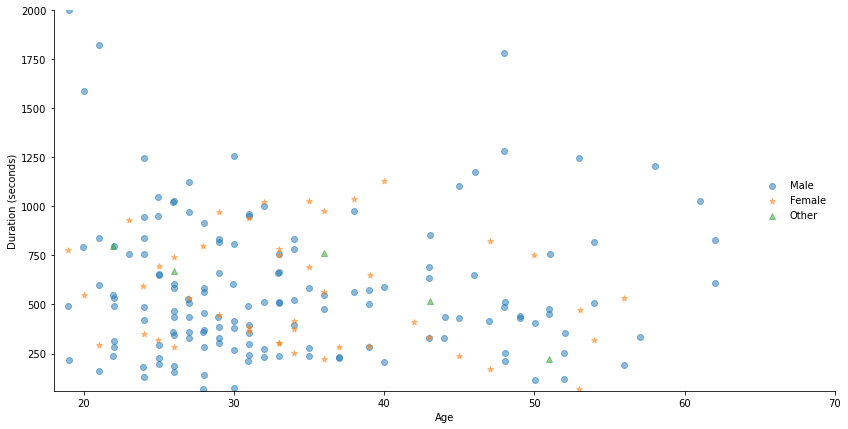

In [72]:
# create a scatter plot with age on the x-axis,
# trip duration on the y-axis,
# with different markers for gender

# set markers for each gender
ttype_makers = [['Male', 'o'],
                ['Female', '*'],
                ['Other', '^']]

# loop through the data to assign the chosen marker to each one
for ttype, marker in ttype_makers:
    plot_data = df_subset.loc[df_subset['member_gender'] == ttype]
    sns.regplot(data=plot_data, x='age', y='duration_sec', x_jitter=0.04, 
                fit_reg=False, marker=marker, scatter_kws={'alpha': 1/2})

# set legend
plt.legend(['Male', 'Female', 'Other'], loc=7, frameon=False)

# limit both axis considering their individual distributions
plt.xlim([18,70])
plt.ylim([60,2000])

# axes labels
plt.ylabel('Duration (seconds)')
plt.xlabel('Age')

# increase figure size
plt.gcf().set_size_inches(14,7)

# remove top and right spines
sns.despine();

**Observations**: 
- As was previously established, most trips are taken by males.
- This subset suggests females take slightly longer trips, but this assertion should be investigated further.
- People in their 20s to 40s take the majority of trips.

#### 17. Multivariate: Age vs. Trip Duration (seconds) vs. User Type

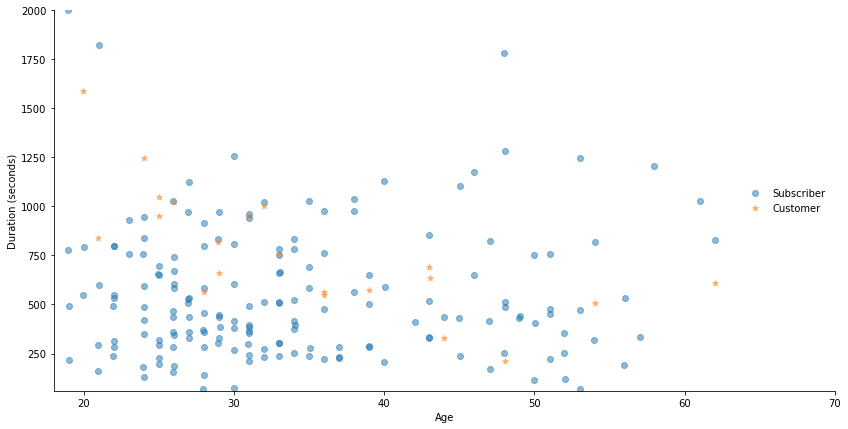

In [73]:
ttype_makers = [['Subscriber', 'o'],
                ['Customer', '*']]

for ttype, marker in ttype_makers:
    plot_data = df_subset.loc[df_subset['user_type'] == ttype]
    sns.regplot(data=plot_data, x='age', y='duration_sec', x_jitter=0.04, 
                fit_reg=False, marker=marker, scatter_kws={'alpha': 1/2})

plt.legend(['Subscriber', 'Customer'], loc=7, frameon=False)
plt.xlim([18,70])
plt.ylim([60,2000])
plt.ylabel('Duration (seconds)')
plt.xlabel('Age')
plt.gcf().set_size_inches(14,7)
sns.despine();

**Observations**: 
- Here, we can see more clearly that casual customers tend to take longer trips than subscribers.
- Older people apparently prefer to be a subscriber instead of customer, but this assertion should be investigated further.

#### 18. Gender vs. Trip Duration (seconds) vs. User Type

In [74]:
# Find the mean trip duration grouped by user type and gender
# This will help see if I plotted the charts below correctly
df.groupby(['user_type', 'member_gender'])['duration_sec'].mean()

user_type   member_gender
Customer    Female           1424.128055
            Male             1253.593492
            Other            1602.300000
Subscriber  Female            696.428031
            Male              616.266085
            Other             912.174539
Name: duration_sec, dtype: float64

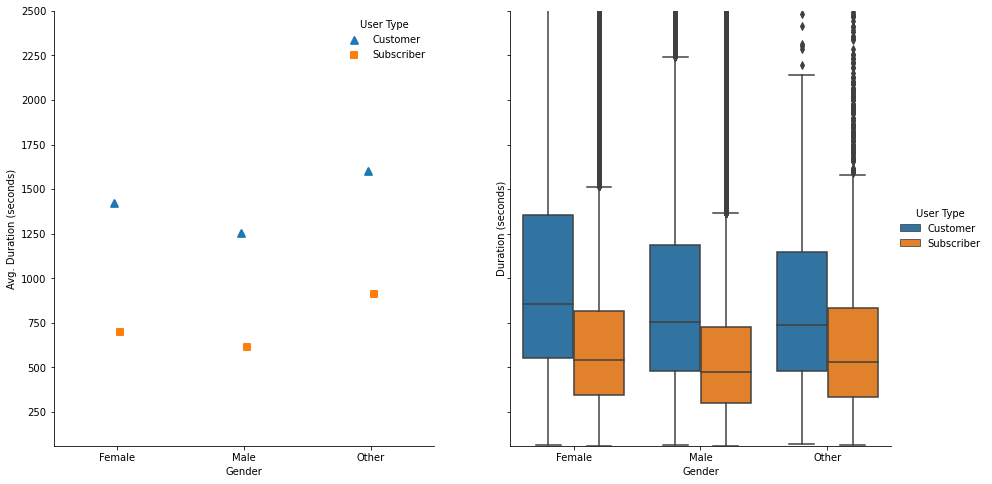

In [75]:
# Plot the data using three variables:
# Gender on the x-axis,
# Mean trip duration on the y-axis and,
# User Type a color encoding (hue)

fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# plot 1: point plot
sns.pointplot(ax=axes[0], data=df, x='member_gender', y='duration_sec', hue='user_type',
             dodge=True, linestyles="", ci=None, markers=["^", "s"])
sns.despine()
axes[0].set_yticks(np.arange(0, 2500+250, 250))
axes[0].legend(title='User Type', frameon=False, loc=1)
axes[0].set_ylabel('Avg. Duration (seconds)')
axes[0].set_xlabel('Gender');

# # plot 2: line plot 
# sns.lineplot(ax=axes[1], data=df, x='member_gender', y='duration_sec', hue='user_type', style='user_type')
# sns.despine()
# axes[1].legend(title='User Type', frameon=False, loc=6, bbox_to_anchor=(1.0, 0.5))
# axes[1].set_ylabel('Avg. Duration (seconds)')
# axes[1].set_xlabel('Gender');

# plot 2: box plot
sns.boxplot(ax=axes[1], data=df, x='member_gender', y='duration_sec', hue='user_type')
axes[1].set_ylim([60, 2500])
axes[1].set_ylabel('Duration (seconds)')
axes[1].set_xlabel('Gender');
axes[1].legend(title='User Type', frameon=False, loc=6, bbox_to_anchor=(1.0, 0.5));

**Observations**:
- From the point plot, we can see that customers have longer average trips than subscribers, for every gender. Also, for non-binary individuals, the average trip is slightly longer for both user type groups, when compared to males and females. When compared to men, women take  slightly longer trips as well. 
- From the box plot, we can see that the distributions for subscribers has less variability than customers', for every gender. 
- Originally, I added a lineplot too, but the lines might infer that there is an order from one gender to the other, which could be misleading to readers. So, I commented out the visualization and presented only the point plot and the box plot. 

#### 19. Hour vs. Average Trip Duration (seconds) vs. Gender

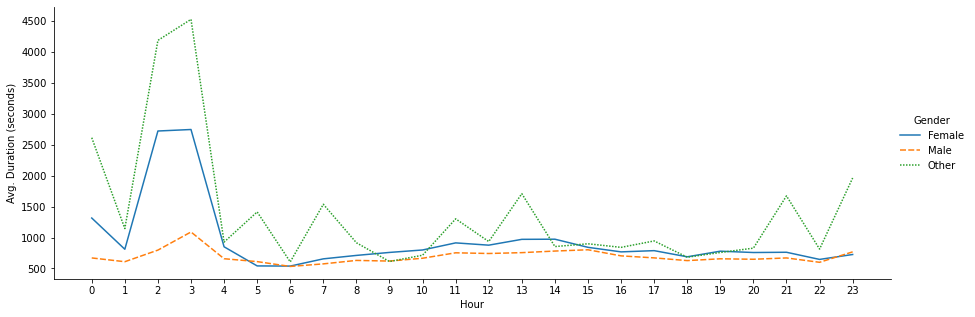

In [76]:
plt.figure(figsize=[15,5])
sns.lineplot(data=df, x='hour', y='duration_sec', hue='member_gender', style='member_gender', ci=None)
sns.despine()
plt.legend(title='Gender', frameon=False, loc=6, bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Avg. Duration (seconds)')
plt.xticks(range(0,24))
plt.xlabel('Hour');

**Observations**:
- Non-binary people enjoy longer trips during the earlier hours of the day (from 1am to 4am), with smaller peaks at other times of the day. 
- There is also a modest peak from females during the same time period. During the rest of the day, their average trip duration is somewhat stable, with an increase from late morning to late afternoon.
- Males also present an even smaller peak during the same time period, but for the most part, their average trip duration remains more or less stable during the whole day.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

From the univariate exploration, it was clear that most trips came from male users and the first scatter plot is representative of that too. However, since the chart suggested that women took slightly longer trips, I proceeded to further investigate that assertion.

From the point plots, we see more clearly that when compared to men, women take slightly longer trips. Also, for non-binary individuals, the average trip is slightly longer for both user type groups, when compared to males and females. Finally, overall, casual customers tend to take longer trips than subscribers.  

From the box plot, we can see that the distributions for subscribers has less variability than customers', for every gender. 

During the rest the day, males and females average trip duration is somewhat stable, with an increase from early morning to late afternoon.

### Were there any interesting or surprising interactions between features?

It was interesting to see that older people apparently prefer to be a subscriber instead of customer, but this warrants further investigation. 

Another interesting find was that non-binary people enjoy longer trips during the earlier hours of the day (from 1am to 4am), with smaller peaks at other times of the day. There is also a modest peak from females during the same time period, which might suggest they'd rather grab a bike after a night out than walking home, but that assertion would require further investigation as well. 

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

